# 机器学习实验五 ——— 层次聚类

> ***2013921 周延霖 信息安全***

## 实验要求

> 基本要求

1. 实现single-linkage层次聚类算法
2. 实现complete-linkage层次聚类算法

> 中级要求

1. 实现average-linkage层次聚类算法
2. 将上述三种算法的性能进行简要对比

> 高级要求

- 通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析

> 数据集：数据自行生成

- **注：数据包含2000个样例，每个样例的前3列表示特征，第4列表示标签**

## 数据生成

数据: 生成包含 N=2000 个三维随机矢量的数据集合，数据集合中随机矢量来自于三个分布模型，分别满足均值矢量 $m1 = [1,1,1]^T$,$m2 = [4,4,4]^T$, $m3 = [8,1,1]^T $和协方差矩阵$S_1 =S_2 =S_3 =I$，其中I是3×3的单位矩阵。在生成数据集合X时，假设来自三个分布模型的先验概率相同 $p(w1) = p(w2) = p(w3) = 1/3$

> 代码如下:

In [1]:
# 导入需要用到的包
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 生成所需要的2000个样本
def random_x(cnt1, cnt2, cnt3, name): 
    cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    
    # 分别为均值坐标，协方差矩阵，个数（空间坐标上的点即符合本次实验的需求）
    a1 = np.random.multivariate_normal((1, 1 ,1), cov, cnt1)
    a2 = np.random.multivariate_normal((4, 4 ,4), cov, cnt2)
    a3 = np.random.multivariate_normal((8, 1 ,1), cov, cnt3)
    
    # 定义点的颜色
    colors0 = '#000000'
    colors1 = '#00CED1'
    colors2 = '#DC143C'
    
    # 每一个点的面积
    area = np.pi
    
    # 绘制空间坐标系下的图
    fig = plt.figure()
    ax = Axes3D(fig)
    x = a1[:, 0]
    y = a1[:, 1] 
    z = a1[:, 2]
    ax.scatter(x, y, z, c = colors0, s = area)
    x = a2[:, 0]
    y = a2[:, 1] 
    z = a2[:, 2]
    ax.scatter(x, y, z, c = colors1, s = area)
    x = a3[:, 0]
    y = a3[:, 1] 
    z = a3[:, 2]
    ax.scatter(x, y, z, c = colors2, s = area)
    
    # 将所有的点和他们所对应的标识特征分别存到两个数组中，index值相同
    ls = []
    result = []
    for i in range(cnt1):
        ls.append(a1[i])
        result.append(1)
    for i in range(cnt2):
        ls.append(a2[i])
        result.append(2)
    for i in range(cnt3):
        ls.append(a3[i])
        result.append(3)
    plt.figure(num = name) 
    
    return ls, result

## 基本要求

### 实现`single-linkage`层次聚类算法

In [3]:
# def single_linkage(kind1, kind2, data):
#     min = float("inf")
#     for i in range(len(kind1)):
#         for j in range(len(kind2)):
#             t = np.linalg.norm(data[kind1[i]] - data[kind2[j]])
#             if t < min:
#                 min = t
#     return min

In [4]:
print(min(1, 2))
print(min(1, 1))
print(max(1, 2))
print((1 + 2) / 2)

1
1
2
1.5


In [5]:
# def single_linkage(row, col, dis):
#     for i in range(row + 1, len(dis)):
#         if i != col:
#             dis2[row][i] = min(dis2[row][i], dis2[col][i])
#     for i in range(0, row - 1):
#         dis2[i][row] = min(dis2[i][row], dis2[i][col])

In [6]:
def single_linkage(row, col, dis):
    for i in range(0, len(dis)):
        if (i != col) & (i != row):
            dis[row][i] = min(dis[row][i], dis[col][i])
            dis[i][row] = min(dis[i][row], dis[i][col])

### 实现`complete-linkage`层次聚类算法

In [7]:
# def complete_linkage(kind1, kind2, data):
#     max = float("-inf")
#     for i in range(len(kind1)):
#         for j in range(len(kind2)):
#             t = np.linalg.norm(data[kind1[i]] - data[kind2[j]])
#             if t > max:
#                 max = t
#     return max

In [8]:
def complete_linkage(row, col, dis):
    for i in range(0, len(dis)):
        if (i != col) & (i != row):
            dis[row][i] = max(dis[row][i], dis[col][i])
            dis[i][row] = max(dis[i][row], dis[i][col])

## 中级要求

### 实现`average-linkage`层次聚类算法

In [9]:
# def average_linkage(kind1, kind2, data):
#     avg = 0.0
#     for i in range(len(kind1)):
#         for j in range(len(kind2)):
#             avg += np.linalg.norm(data[kind1[i]] - data[kind2[j]]) 
#     return avg / (len(kind1) * len(kind2))

In [10]:
# def average_linkage(row, col, dis, category):
#     for i in range(row + 1, len(dis)):
#         if i != col:
#             dis2[row][i] = (dis2[row][i] * len(category[row]) + dis2[col][i] * len(category[col])) / (len(category[row]) * len(category[col]))
#     for i in range(0, row - 1):
#         dis2[i][row] = (dis2[i][row] + dis2[i][col]) / 2

In [11]:
def average_linkage(row, col, dis, l1, l2):
    for i in range(0, len(dis)):
        if (i != col) & (i != row):
            dis[row][i] = (dis[row][i] * l1 + dis[col][i] * l2) / (l1 * l2)
            dis[i][row] = (dis[i][row] * l1 + dis[i][col] * l2) / (l1 * l2)

### 对比

In [12]:
# 类似标准差
print(np.linalg.norm([-3, -4, 0]))

5.0


In [13]:
# 首先计算每个点之间的距离
def distance(data):
    ls = [ [] for i in range(len(data))]
    
    # 构造距离矩阵
    for i in range(len(data)):
        for j in range(len(data)):
            if i != j :
                ls[i].append(np.linalg.norm(data[i] - data[j]))
            else:
                ls[i].append(float("inf"))
    
    # # 构造一个右上三角矩阵
    # for i in range(len(data)):
    #     for j in range(len(data)):
    #         if i >= j:
    #             ls[i].append(float("inf"))
    #         else:
    #             ls[i].append(np.linalg.norm(data[i] - data[j]))

    return ls 

### 数据展示

In [14]:
def show(result, data):
    x = [[] for i in range(len(result))]
    y = [[] for i in range(len(result))]
    z = [[] for i in range(len(result))]
    # 第一个循环是几个簇
    for i in range(len(result)):
        # 第二个循环是每一个簇中的点数（对应点的序号）
        for j in range(len(result[i])):
            # data储存点的坐标，result[i][j]对应序号
            x[i].append(data[result[i][j]][0])
            y[i].append(data[result[i][j]][1])
            z[i].append(data[result[i][j]][2])
            
    # 点的颜色
    colors0 = '#000000'
    colors1 = '#00CED1' 
    colors2 = '#DC143C'
    
    # 每一个点面积
    area = np.pi   
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x[0], y[0], z[0], c = colors0, s = area)
    ax.scatter(x[1], y[1], z[1], c = colors1, s = area)
    ax.scatter(x[2], y[2], z[2], c = colors2, s = area)

> 首先是最小距离的测试

/var/folders/3g/0qh1978d1klcf1y3cxll683r0000gn/T/ipykernel_22429/788350426.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


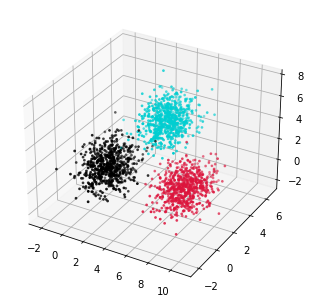

<Figure size 432x288 with 0 Axes>

In [15]:
data1, k1 = random_x(666, 667, 667, "散点图")

In [16]:
# 为距离矩阵
dis1 = distance(data1)

In [17]:
# shape即为矩阵各个维度的大小
mid = np.asarray(dis1)
print(mid.shape)

(2000, 2000)


In [18]:
print(len(mid[1999]))

2000


In [19]:
# 分别取行和列
print(mid.argmin())
print((mid.argmin() // 2000))
print((mid.argmin() % 2000))

72225
36
225


In [20]:
# 对应各个簇，一个元素一个簇
category = []

In [21]:
# 先分为n个簇
for i in range(len(data1)):
    temp = []
    temp.append(i)
    category.append(temp)

In [22]:
print("目前为" + str(len(category)) + "个簇")

目前为2000个簇


In [23]:
while len(dis1) > 3:
    t = np.asarray(dis1)
    
    # w为簇的个数
    w = t.shape[1]
    position = t.argmin()  
    
    # 找到距离矩阵中的最小值对应的行和列
    row, col = position // w, position % w  
    
    # 更新簇中的内容
    if row > col:
        temp = category[row]
        temp = temp + category[col]
        category[col] = temp
        temp = category.pop(row)
    else:
        temp = category[col]
        temp = temp + category[row]
        category[row] = temp
        temp = category.pop(col)
    # temp = category.pop(col)
    # temp = temp + category[row]
    # category[row] = temp
    
    # 更新距离矩阵
    if row > col:
        single_linkage(col, row, dis1)
        dis1.pop(row)
        for i in range(len(dis1)):
            dis1[i].pop(row)
    else:
        single_linkage(row, col, dis1)
        dis1.pop(col)
        for i in range(len(dis1)):
            dis1[i].pop(col)
    
    
    # single_linkage(row, col, dis2)
    # dis2.pop(col)
    # for i in range(len(dis2)):
    #     dis2[i].pop(col)

    # for i in range(row + 1, len(dis2)):
    #     dis2[row][i] = single_linkage(category[row], category[i], data2)
    # for i in range(0, row - 1):
    #     dis2[i][row] = single_linkage(category[row], category[i], data2)
    
    # 输出进度，到最后会变的很慢
    if (len(category) % 100) == 0:
        print("目前为" + str(len(category)) + "个簇")
        # print(len(dis2))
        
#     if (len(category) < 200) & ((len(category) % 10) == 0):
#         print("目前为" + str(len(category)) + "个簇")
#         # print(len(dis2))
        
#     if len(category) < 50:
#         print("目前为" + str(len(category)) + "个簇")

目前为1900个簇
目前为1800个簇
目前为1700个簇
目前为1600个簇
目前为1500个簇
目前为1400个簇
目前为1300个簇
目前为1200个簇
目前为1100个簇
目前为1000个簇
目前为900个簇
目前为800个簇
目前为700个簇
目前为600个簇
目前为500个簇
目前为400个簇
目前为300个簇
目前为200个簇
目前为100个簇


In [24]:
# print(len(category))
# print(len(dis1))

In [25]:
# print(category)
# print(dis1)

/var/folders/3g/0qh1978d1klcf1y3cxll683r0000gn/T/ipykernel_22429/788350426.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


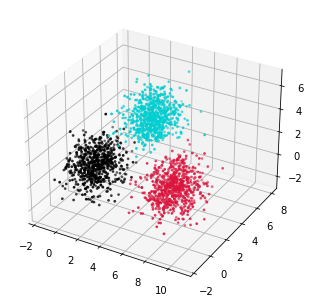

<Figure size 432x288 with 0 Axes>

In [46]:
show(category, data1)

> 接下来是最大距离的测试

In [27]:
# data3, k3 = random_x(666, 667, 667, "散点图")
# dis3 = distance(data3)
# result3 = Clustering(data3, dis3, 1)
# show(result3, data3)

/var/folders/3g/0qh1978d1klcf1y3cxll683r0000gn/T/ipykernel_22429/788350426.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


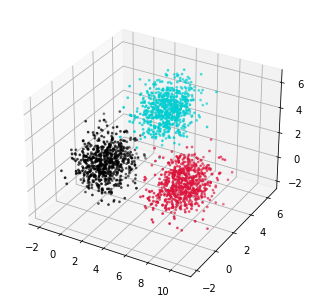

<Figure size 432x288 with 0 Axes>

In [28]:
data2, k2 = random_x(666, 667, 667, "散点图")

In [29]:
dis2 = distance(data2)

In [30]:
category = []

In [31]:
for i in range(len(data2)):
    temp = []
    temp.append(i)
    category.append(temp)

In [32]:
while len(dis2) > 3:
    t = np.asarray(dis2)
    
    # w为簇的个数
    w = t.shape[1]
    position = t.argmin()  
    
    # 找到距离矩阵中的最小值对应的行和列
    row, col = position // w, position % w  
    
    # 更新簇中的内容
    if row > col:
        temp = category.pop(row)
        temp = temp + category[col]
        category[col] = temp
    else:
        temp = category.pop(col)
        temp = temp + category[row]
        category[row] = temp
    
    # 更新距离矩阵
    if row > col:
        complete_linkage(col, row, dis2)
        dis2.pop(row)
        for i in range(len(dis2)):
            dis2[i].pop(row)
    else:
        complete_linkage(row, col, dis2)
        dis2.pop(col)
        for i in range(len(dis2)):
            dis2[i].pop(col)
    
    # 输出进度，到最后会变的很慢
    if (len(category) % 100) == 0:
        print("目前为" + str(len(category)) + "个簇")

目前为1900个簇
目前为1800个簇
目前为1700个簇
目前为1600个簇
目前为1500个簇
目前为1400个簇
目前为1300个簇
目前为1200个簇
目前为1100个簇
目前为1000个簇
目前为900个簇
目前为800个簇
目前为700个簇
目前为600个簇
目前为500个簇
目前为400个簇
目前为300个簇
目前为200个簇
目前为100个簇


/var/folders/3g/0qh1978d1klcf1y3cxll683r0000gn/T/ipykernel_22429/3642600818.py:22: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


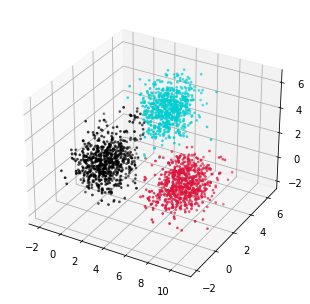

In [33]:
show(category, data2)

> 最后是平均距离的测试

In [34]:
# data1, k1 = random_x(666, 667, 667, "散点图")
# dis1 = distance(data1)
# result1 = Clustering(data1, dis1, 2)
# show(result1, data1)

/var/folders/3g/0qh1978d1klcf1y3cxll683r0000gn/T/ipykernel_22429/788350426.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


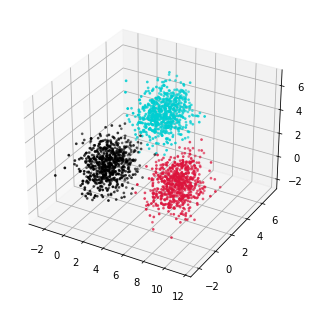

<Figure size 432x288 with 0 Axes>

In [35]:
data3, k3 = random_x(666, 667, 667, "散点图")

In [36]:
dis3 = distance(data3)

In [37]:
category = []
for i in range(len(data3)):
    temp = []
    temp.append(i)
    category.append(temp)

In [38]:
while len(dis3) > 3:
    t = np.asarray(dis3)
    
    # w为簇的个数
    w = t.shape[1]
    position = t.argmin()  
    
    # 找到距离矩阵中的最小值对应的行和列
    row, col = position // w, position % w  
    row_len = len(category[row])
    col_len = len(category[col])
    
    # 更新簇中的内容
    if row > col:
        temp = category.pop(row)
        temp = temp + category[col]
        category[col] = temp
    else:
        temp = category.pop(col)
        temp = temp + category[row]
        category[row] = temp
    
    # 更新距离矩阵
    if row > col:
        average_linkage(col, row, dis3, col_len, row_len)
        dis3.pop(row)
        for i in range(len(dis3)):
            dis3[i].pop(row)
    else:
        average_linkage(row, col, dis3, row_len, col_len)
        dis3.pop(col)
        for i in range(len(dis3)):
            dis3[i].pop(col)
    
    if (len(category) % 100) == 0:
        print("目前为" + str(len(category)) + "个簇")

目前为1900个簇
目前为1800个簇
目前为1700个簇
目前为1600个簇
目前为1500个簇
目前为1400个簇
目前为1300个簇
目前为1200个簇
目前为1100个簇
目前为1000个簇
目前为900个簇
目前为800个簇
目前为700个簇
目前为600个簇
目前为500个簇
目前为400个簇
目前为300个簇
目前为200个簇
目前为100个簇


In [39]:
# print(category)

/var/folders/3g/0qh1978d1klcf1y3cxll683r0000gn/T/ipykernel_22429/788350426.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


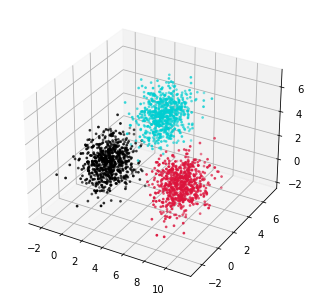

<Figure size 432x288 with 0 Axes>

In [45]:
show(category, data3)

## 高级要求

### 变换簇的个数，测试三种算法的性能

- 都聚合为一个簇，即将大于的数字改为1

> 重新定义展示函数

In [41]:
def show1(result, data):
    x = [[] for i in range(len(result))]
    y = [[] for i in range(len(result))]
    z = [[] for i in range(len(result))]
    # 第一个循环是几个簇
    for i in range(len(result)):
        # 第二个循环是每一个簇中的点数（对应点的序号）
        for j in range(len(result[i])):
            # data储存点的坐标，result[i][j]对应序号
            x[i].append(data[result[i][j]][0])
            y[i].append(data[result[i][j]][1])
            z[i].append(data[result[i][j]][2])
            
    # 点的颜色
    colors0 = '#000000'
    
    # 每一个点面积
    area = np.pi   
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x[0], y[0], z[0], c = colors0, s = area)

- 首先是最短距离

/var/folders/3g/0qh1978d1klcf1y3cxll683r0000gn/T/ipykernel_22429/788350426.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


目前为1900个簇
目前为1800个簇
目前为1700个簇
目前为1600个簇
目前为1500个簇
目前为1400个簇
目前为1300个簇
目前为1200个簇
目前为1100个簇
目前为1000个簇
目前为900个簇
目前为800个簇
目前为700个簇
目前为600个簇
目前为500个簇
目前为400个簇
目前为300个簇
目前为200个簇
目前为100个簇


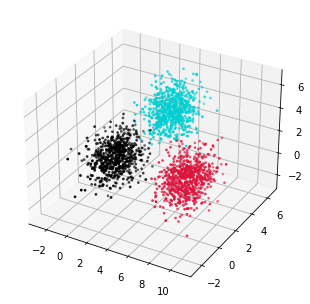

<Figure size 432x288 with 0 Axes>

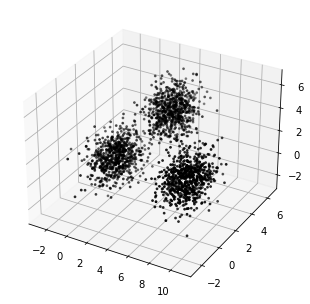

In [42]:
data1, k1 = random_x(666, 667, 667, "散点图")
dis1 = distance(data1)
category = []
for i in range(len(data1)):
    temp = []
    temp.append(i)
    category.append(temp)
while len(dis1) > 1:
    t = np.asarray(dis1)
    
    # w为簇的个数
    w = t.shape[1]
    position = t.argmin()  
    
    # 找到距离矩阵中的最小值对应的行和列
    row, col = position // w, position % w  
    
    # 更新簇中的内容
    if row > col:
        temp = category[row]
        temp = temp + category[col]
        category[col] = temp
        temp = category.pop(row)
    else:
        temp = category[col]
        temp = temp + category[row]
        category[row] = temp
        temp = category.pop(col)
    # temp = category.pop(col)
    # temp = temp + category[row]
    # category[row] = temp
    
    # 更新距离矩阵
    if row > col:
        single_linkage(col, row, dis1)
        dis1.pop(row)
        for i in range(len(dis1)):
            dis1[i].pop(row)
    else:
        single_linkage(row, col, dis1)
        dis1.pop(col)
        for i in range(len(dis1)):
            dis1[i].pop(col)
    
    
    # single_linkage(row, col, dis2)
    # dis2.pop(col)
    # for i in range(len(dis2)):
    #     dis2[i].pop(col)

    # for i in range(row + 1, len(dis2)):
    #     dis2[row][i] = single_linkage(category[row], category[i], data2)
    # for i in range(0, row - 1):
    #     dis2[i][row] = single_linkage(category[row], category[i], data2)
    
    # 输出进度，到最后会变的很慢
    if (len(category) % 100) == 0:
        print("目前为" + str(len(category)) + "个簇")
        # print(len(dis2))
        
#     if (len(category) < 200) & ((len(category) % 10) == 0):
#         print("目前为" + str(len(category)) + "个簇")
#         # print(len(dis2))
        
#     if len(category) < 50:
#         print("目前为" + str(len(category)) + "个簇")
show1(category, data1)

- 接下来是最长距离

/var/folders/3g/0qh1978d1klcf1y3cxll683r0000gn/T/ipykernel_22429/788350426.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


目前为1900个簇
目前为1800个簇
目前为1700个簇
目前为1600个簇
目前为1500个簇
目前为1400个簇
目前为1300个簇
目前为1200个簇
目前为1100个簇
目前为1000个簇
目前为900个簇
目前为800个簇
目前为700个簇
目前为600个簇
目前为500个簇
目前为400个簇
目前为300个簇
目前为200个簇
目前为100个簇


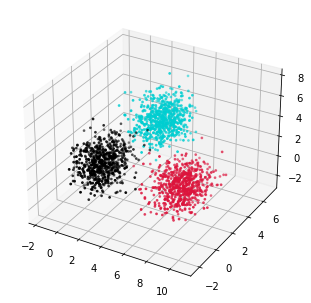

<Figure size 432x288 with 0 Axes>

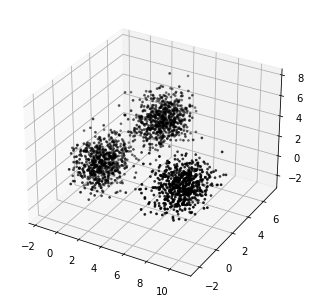

In [43]:
data2, k2 = random_x(666, 667, 667, "散点图")
dis2 = distance(data2)
category = []
for i in range(len(data2)):
    temp = []
    temp.append(i)
    category.append(temp)
while len(dis2) > 1:
    t = np.asarray(dis2)
    
    # w为簇的个数
    w = t.shape[1]
    position = t.argmin()  
    
    # 找到距离矩阵中的最小值对应的行和列
    row, col = position // w, position % w  
    
    # 更新簇中的内容
    if row > col:
        temp = category.pop(row)
        temp = temp + category[col]
        category[col] = temp
    else:
        temp = category.pop(col)
        temp = temp + category[row]
        category[row] = temp
    
    # 更新距离矩阵
    if row > col:
        complete_linkage(col, row, dis2)
        dis2.pop(row)
        for i in range(len(dis2)):
            dis2[i].pop(row)
    else:
        complete_linkage(row, col, dis2)
        dis2.pop(col)
        for i in range(len(dis2)):
            dis2[i].pop(col)
    
    # 输出进度，到最后会变的很慢
    if (len(category) % 100) == 0:
        print("目前为" + str(len(category)) + "个簇")
show1(category, data2)

- 最后是平均距离

/var/folders/3g/0qh1978d1klcf1y3cxll683r0000gn/T/ipykernel_22429/788350426.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


目前为1900个簇
目前为1800个簇
目前为1700个簇
目前为1600个簇
目前为1500个簇
目前为1400个簇
目前为1300个簇
目前为1200个簇
目前为1100个簇
目前为1000个簇
目前为900个簇
目前为800个簇
目前为700个簇
目前为600个簇
目前为500个簇
目前为400个簇
目前为300个簇
目前为200个簇
目前为100个簇


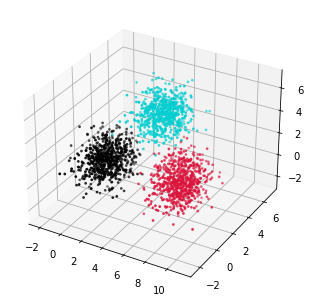

<Figure size 432x288 with 0 Axes>

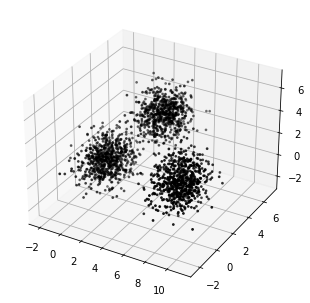

In [44]:
data3, k3 = random_x(666, 667, 667, "散点图")
dis3 = distance(data3)
category = []
for i in range(len(data3)):
    temp = []
    temp.append(i)
    category.append(temp)
while len(dis3) > 1:
    t = np.asarray(dis3)
    
    # w为簇的个数
    w = t.shape[1]
    position = t.argmin()  
    
    # 找到距离矩阵中的最小值对应的行和列
    row, col = position // w, position % w  
    row_len = len(category[row])
    col_len = len(category[col])
    
    # 更新簇中的内容
    if row > col:
        temp = category.pop(row)
        temp = temp + category[col]
        category[col] = temp
    else:
        temp = category.pop(col)
        temp = temp + category[row]
        category[row] = temp
    
    # 更新距离矩阵
    if row > col:
        average_linkage(col, row, dis3, col_len, row_len)
        dis3.pop(row)
        for i in range(len(dis3)):
            dis3[i].pop(row)
    else:
        average_linkage(row, col, dis3, row_len, col_len)
        dis3.pop(col)
        for i in range(len(dis3)):
            dis3[i].pop(col)
    
    if (len(category) % 100) == 0:
        print("目前为" + str(len(category)) + "个簇")
show1(category, data3)

***本次实验到此结束***

### 分析

通过上述实验，我们可以明显的看出，使用average-linkage算法的实验结果明显优于使用signle-linkage和complete-linkage算法的实验结果。signle-linkage和complete-linkage算法在处理边缘和交界处的数据时表现不够好，甚至导致了黑色数据内部出现了可以观测的蓝色。通过分析三种算法，可以得出结论：<br/>
- SingleLinkage容易造成两个聚类明明从“大局”上离得比较远，但是由于其中个别的点距离比较近就被合并了，并且这样合并之后这种情况会进一步扩大，最后会得到比较松散的聚类，并且在本次实验中具有不确定性，就像我某一次做的时候基本所有的点都是一个类中，个人猜测是由于其中两个点离得比较近，所以导致把大部分都合并为一个整体。
- CompleteLinkage会导致两个 cluster 即使已经很接近了，但是只要有不配合的点存在，就不会合并。这两种相似度的定义方法的共同问题就是指考虑了某个有特点的数据，而没有考虑类内数据的整体特点，但是还是比SingleLinkage要优秀一点，至少不会把明明离得比较远的点合并到一个簇中。
- Average-linkage：这种方法就是把两个集合中的点两两的距离全部放在一起求一个平均值，相对也能得到合适一点的结果。考虑了整体情况，不会因为某些极端值或边界上的点影响整体结果，比以上两个算法都要优秀。

## 总结与展望

### 总结

通过本次实验，了解到了多种聚类的算法，也对理论课上的知识点进行了复现，对相关的算法也更加的了解，也对机器学习更加的喜爱。

### 展望

期望自己在未来有更好的发展，`心想事成、万事胜意！`